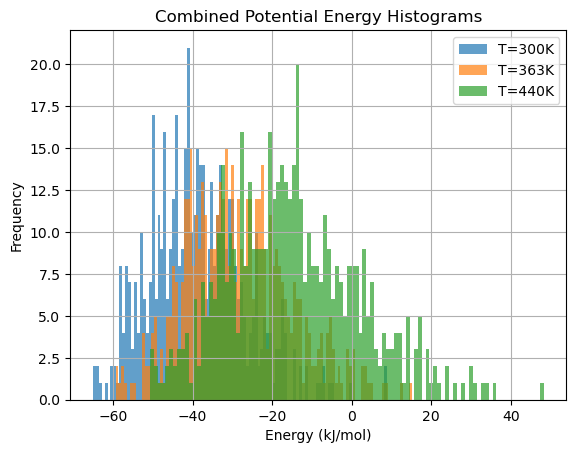

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the list of temperatures (in Kelvin) for your simulations
temperatures = [300, 363, 440]

# Initialize lists to store energy data
energy_data = []

# Define the paths to your .xvg files
xvg_paths = [
    "/scratch/work/courses/CHEM-GA-2671-2023fa/students/sw4384/comp-lab-class-2023/Week5/T300/energy.xvg",
    "/scratch/work/courses/CHEM-GA-2671-2023fa/students/sw4384/comp-lab-class-2023/Week5/T363/energy.xvg",
    "/scratch/work/courses/CHEM-GA-2671-2023fa/students/sw4384/comp-lab-class-2023/Week5/T440/energy.xvg"
]

# Loop through the temperatures and load the energy data
for xvg_path in xvg_paths:
    with open(xvg_path, 'r') as f:
        lines = f.readlines()
        potential_energy = [line.split() for line in lines if not line.startswith(("#", "@"))]
        potential_energy = np.array(potential_energy, dtype=float)
        energy_data.append(potential_energy)

# Create a single plot with multiple histograms
plt.figure()
for i, temp in enumerate(temperatures):
    potential_energy = energy_data[i][:, 1]
    histogram, bin_edges = np.histogram(potential_energy, bins=100, density=True)
    plt.hist(potential_energy, bins=bin_edges, label=f'T={temp}K', alpha=0.7)

plt.title("Combined Potential Energy Histograms")
plt.xlabel("Energy (kJ/mol)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

# Show the combined plot (optional)
plt.show()
